# Delta Experiment

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

from src.models import MLP
from src.models import train
from src.utils import init_dataloader
from src.calc import DeltaCalculator
from src.visualize import DeltaVisualizer
from src.directions import RandomDirection
from src.directions import MaxEigenvector

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = init_dataloader(
    dataset_name='MNIST',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=True,
    size=64 * (10000 // 64)
)

test_loader = init_dataloader(
    dataset_name='MNIST',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=False,
    size=64 * (10000 // 64)
)

In [3]:
model = MLP(layers_num=2, hidden=256, input_channels=1, input_sizes=(28, 28), classes=10).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train(model, criterion, train_loader, optimizer, num_epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

In [4]:
core = RandomDirection(model, criterion, train_loader)
calc = DeltaCalculator(model, criterion, train_loader, core)
vis = DeltaVisualizer(calc)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

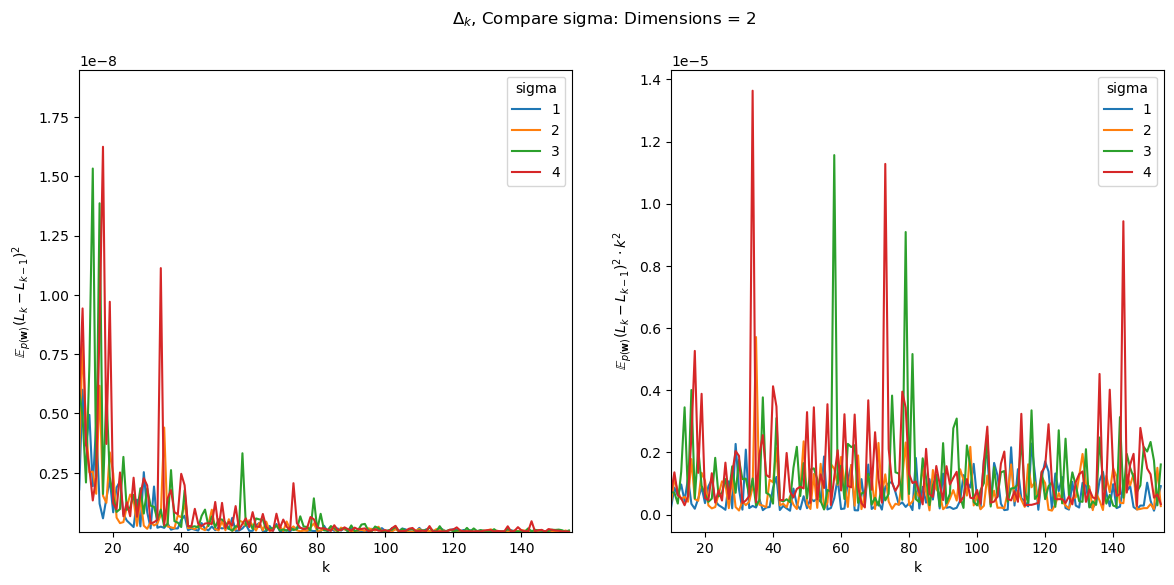

In [5]:
vis.compare_params(
    {'dim': 2},
    'sigma',
    [1, 2, 3, 4],
    num_samples=64,
    begin=10
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

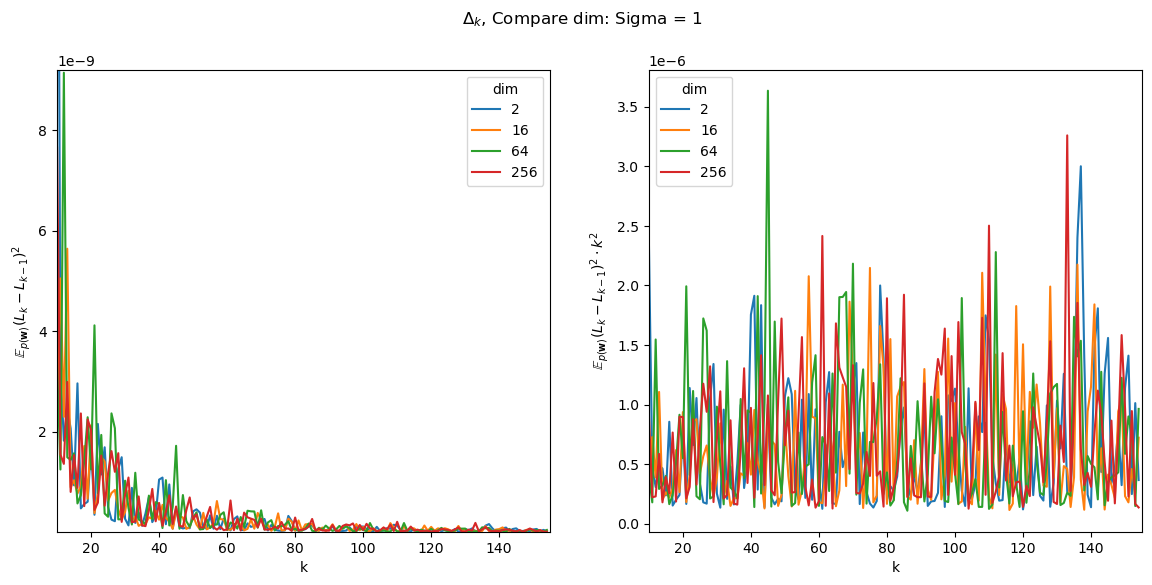

In [6]:
vis.compare_params(
    {'sigma': 1},
    'dim',
    [2, 16, 64, 256],
    num_samples=64,
    begin=10
)

  0%|          | 0/256 [00:00<?, ?it/s]

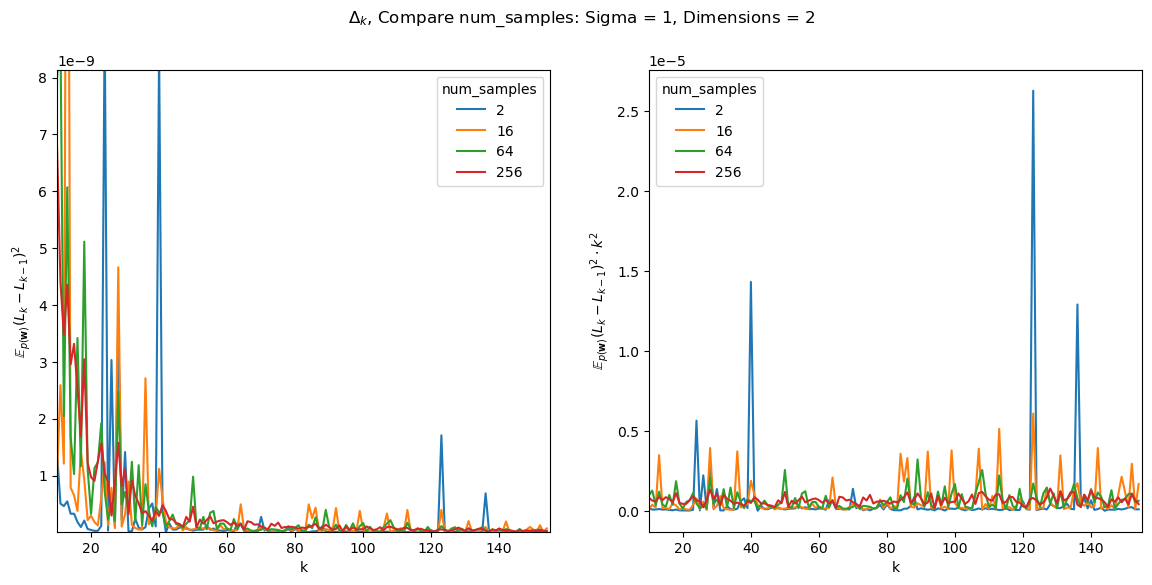

In [7]:
vis.compare_samples_num(
    {'sigma': 1, 'dim': 2},
    [2, 16, 64, 256],
    begin=10
)

In [8]:
core = MaxEigenvector(model, criterion, train_loader)
calc = DeltaCalculator(model, criterion, train_loader, core)
vis = DeltaVisualizer(calc)

In [ ]:
vis.visualize_all(
    {'dim': 16, 'sigma': 1},
    num_samples=64,
    begin=10
)

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]